/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/806416354.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)
/Users/dennis/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (19,49,143,144,145,146,147,148,149) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/806416354.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

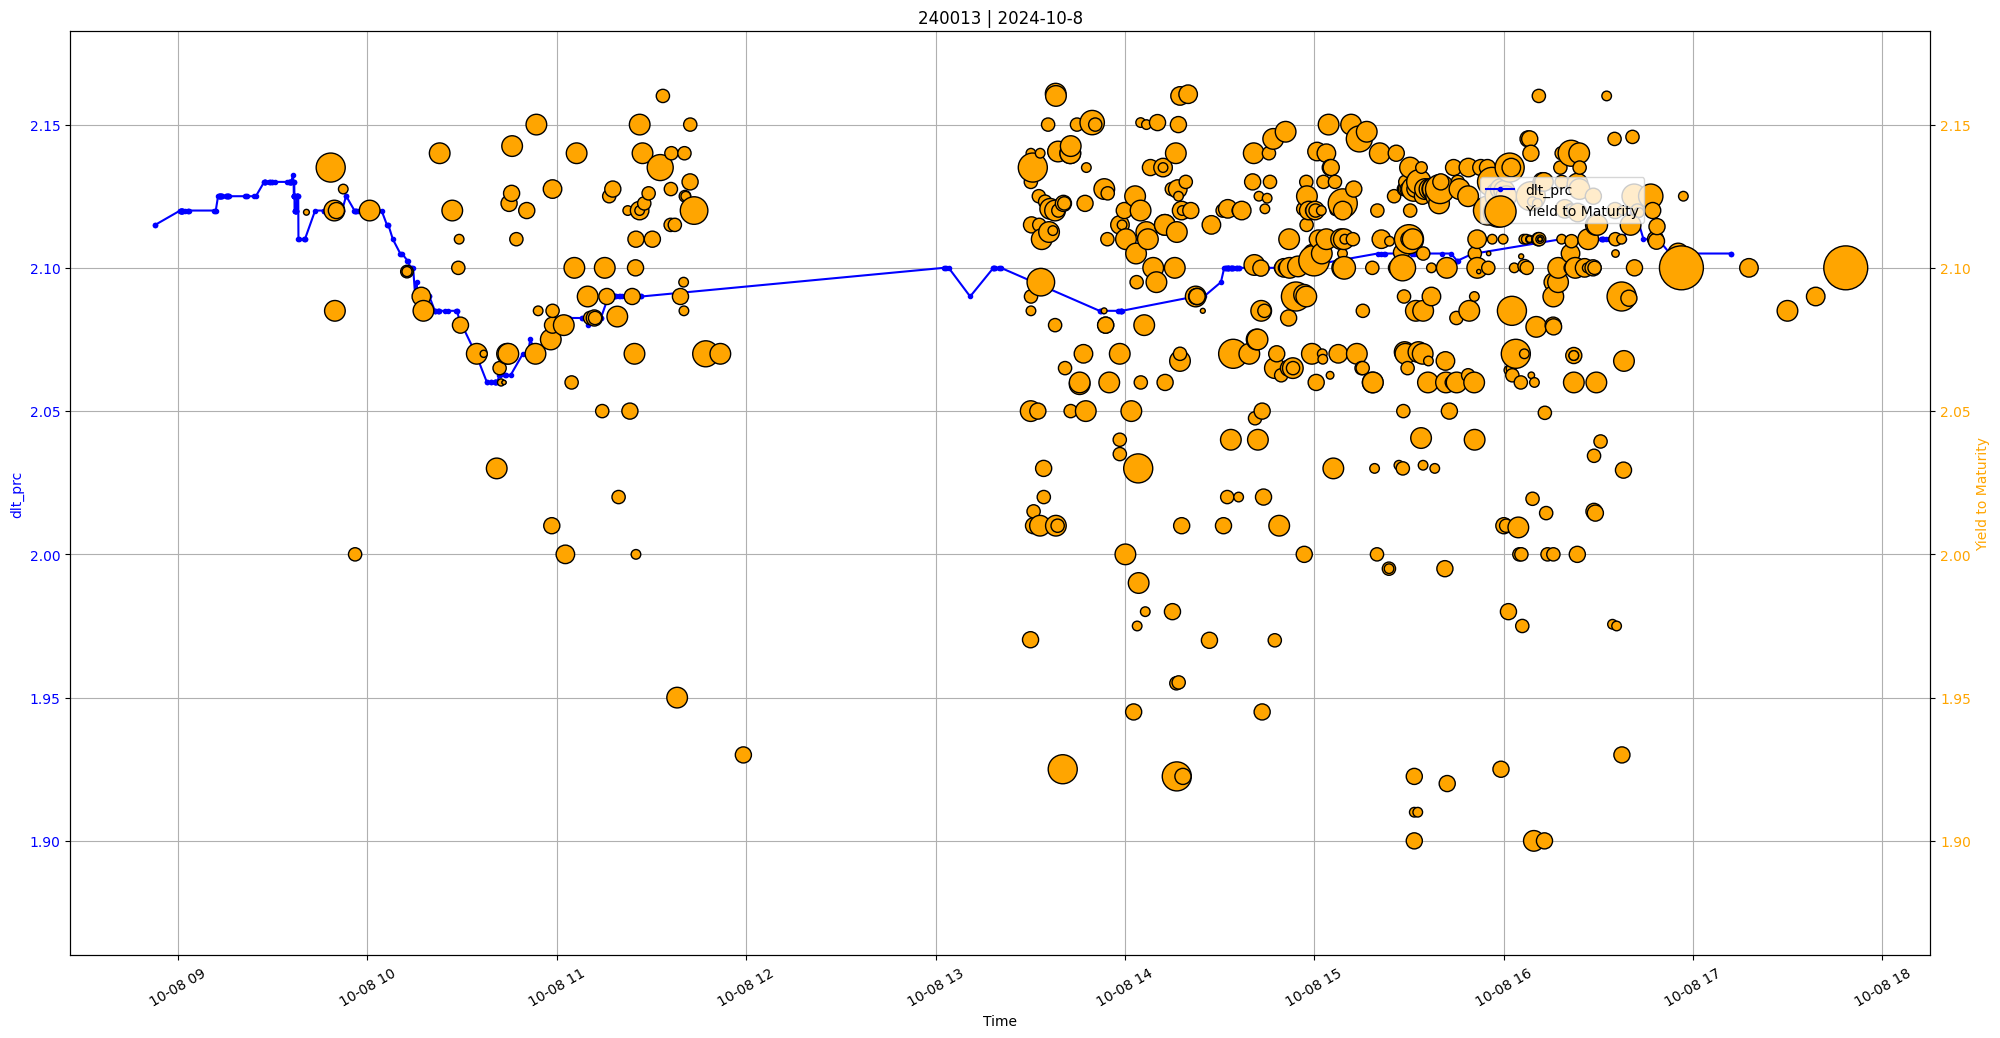

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取并筛选CSV文件中的债券数据
df_mkt = pd.read_csv('bond_brk10_08.csv')

# 筛选特定债券数据
df_mkt_filtered_data = df_mkt[df_mkt['bond_shrt_nm'] == '24附息国债13']

# 转换时间戳格式并去除时区信息
df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)

# 计算 'dlt_prc' 列的均值和标准差
mean_dlt_prc = df_mkt_filtered_data['dlt_prc'].mean()
std_dlt_prc = df_mkt_filtered_data['dlt_prc'].std()

# 剔除偏离均值10个标准差之外的数据
df_mkt_filtered_data = df_mkt_filtered_data[np.abs(df_mkt_filtered_data['dlt_prc'] - mean_dlt_prc) <= 10 * std_dlt_prc]

# 排序数据
df_mkt_filtered_data = df_mkt_filtered_data.sort_values(by='timeStamp', ascending=True)

# 读取CSV文件并筛选特定债券数据
ndm_transaction_data = pd.read_csv('bond_dtl_10_08.csv')

# 筛选特定债券数据
ndm_transaction_filtered_data = ndm_transaction_data[ndm_transaction_data['bnds_nm'] == '24附息国债13']

# 转换时间戳格式 
ndm_transaction_filtered_data['timeStamp'] = pd.to_datetime(ndm_transaction_filtered_data['dl_tm']).dt.tz_localize(None)
ndm_transaction_filtered_data = ndm_transaction_filtered_data[ndm_transaction_filtered_data['timeStamp'].dt.date == pd.to_datetime('2024-10-08').date()]

# 排序
ndm_transaction_sorted_data = ndm_transaction_filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
fig, ax1 = plt.subplots(figsize=(24, 12))

# 绘制dlt_prc的折线图
ax1.plot(df_mkt_filtered_data['timeStamp'], df_mkt_filtered_data['dlt_prc'], marker='o', markersize=3, label='dlt_prc', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('dlt_prc', color='blue')
ax1.set_title('240013 | 2024-10-8')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=30)
ax1.grid(True)

# 读取nmnl_vol列数据
nmnl_vol = ndm_transaction_sorted_data['nmnl_vol']

# 计算合理的size范围，以及进行log转换
size_min = 5  # 最小size
size_max = 1000  # 最大size
size_range = nmnl_vol  # 使用log转换

# 根据size范围进行归一化
# size_scaled = (size_range - np.min(size_range)) / (np.max(size_range) - np.min(size_range))
# 映射到合理的size范围
scatter_sizes = size_min + (size_max - size_min) * size_scaled

# 创建一个新的Y轴用于yld_to_mrty的散点图
ax2 = ax1.twinx()
ax2.scatter(
    ndm_transaction_sorted_data['timeStamp'],
    ndm_transaction_sorted_data['yld_to_mrty'],
    marker='o',
    color='orange',
    edgecolors='black',
    s=scatter_sizes,
    label='Yield to Maturity'
)
ax2.set_ylabel('Yield to Maturity', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 统一两个y轴的范围
ax2.set_ylim(dlt_prc_min - 0.20, dlt_prc_max + 0.05)  # 适当调整范围以避免边界挤压
ax2_ylim = ax2.get_ylim()
ax1.set_ylim(ax2_ylim)

# 显示图例
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85), bbox_transform=ax1.transAxes)

# 显示图像
plt.show()


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/1549779476.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)
/Users/dennis/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (19,49,143,144,145,146,147,148,149) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/1549779476.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

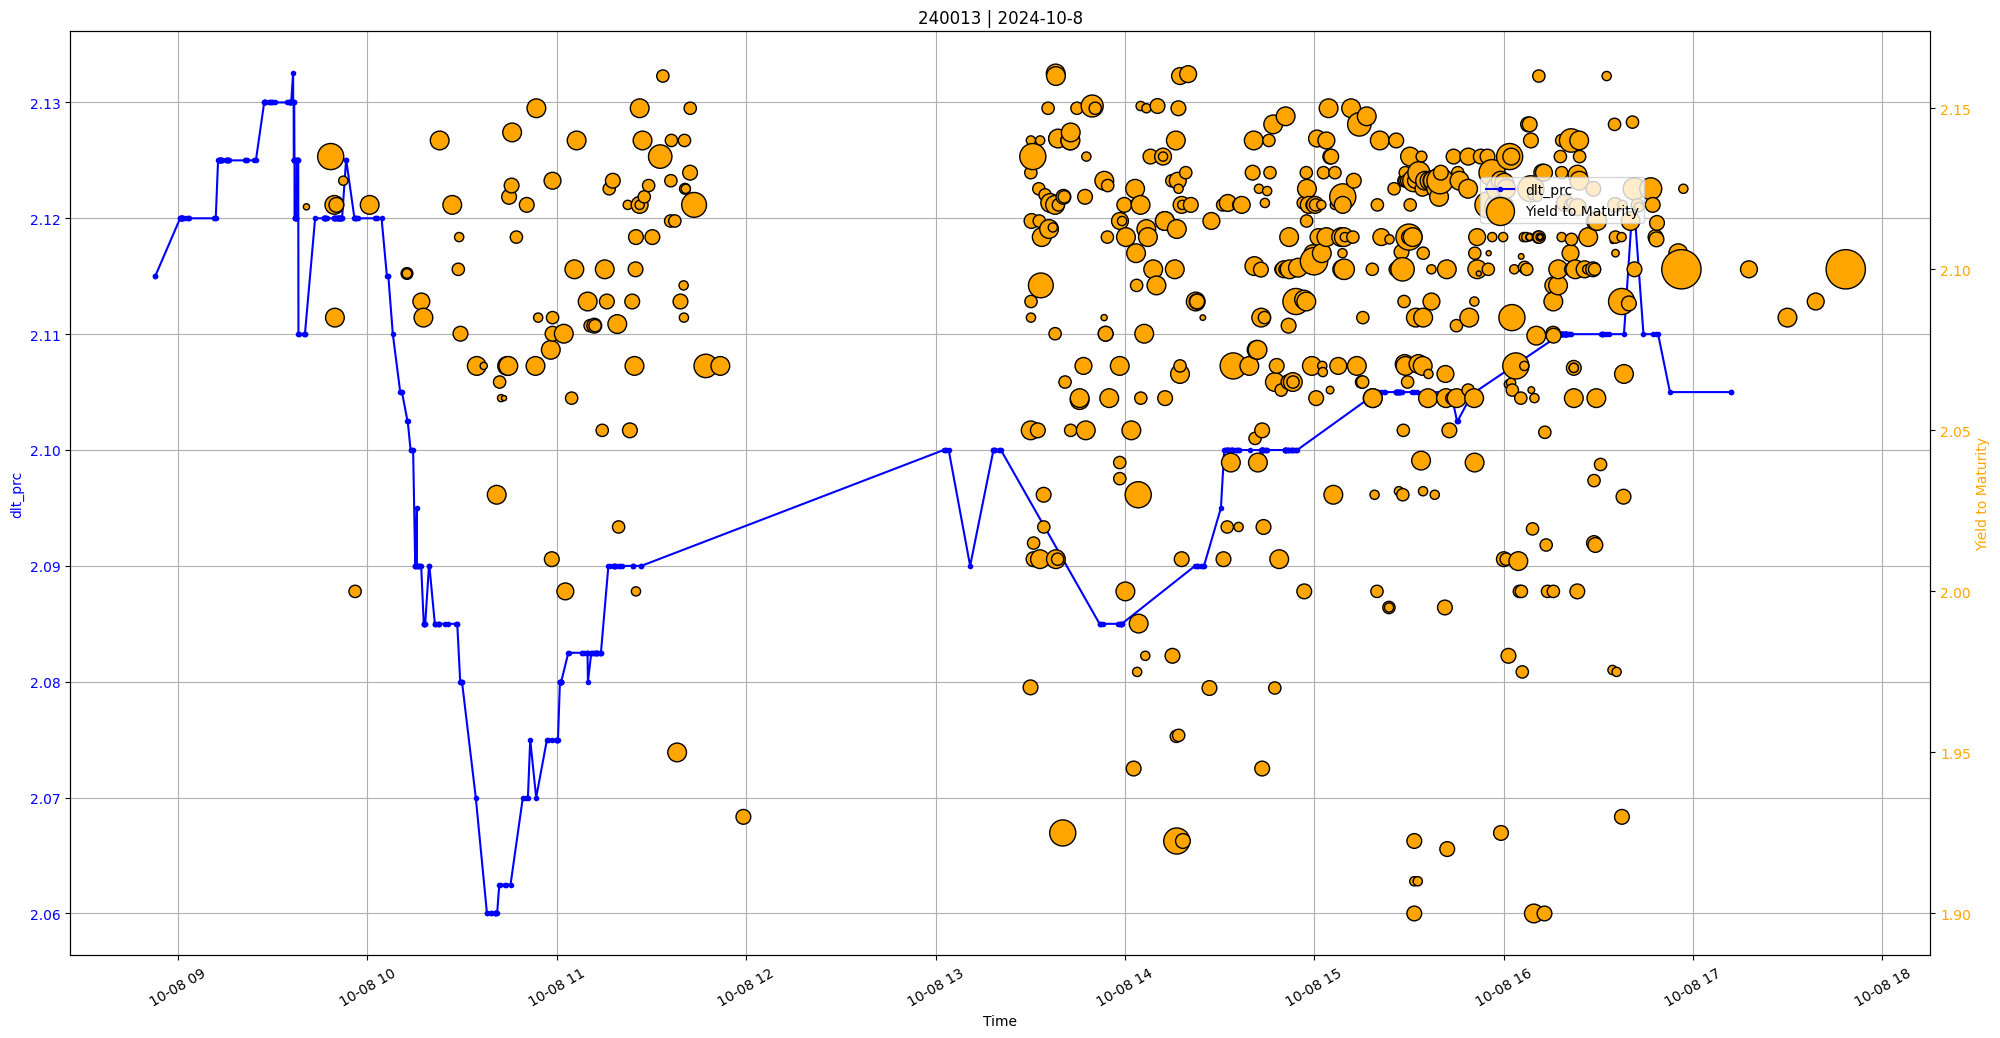

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取并筛选CSV文件中的债券数据
df_mkt = pd.read_csv('bond_brk10_08.csv')

# 筛选特定债券数据
df_mkt_filtered_data = df_mkt[df_mkt['bond_shrt_nm'] == '24附息国债13']

# 转换时间戳格式并去除时区信息
df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)

# 计算 'dlt_prc' 列的均值和标准差
mean_dlt_prc = df_mkt_filtered_data['dlt_prc'].mean()
std_dlt_prc = df_mkt_filtered_data['dlt_prc'].std()

# 剔除偏离均值10个标准差之外的数据
df_mkt_filtered_data = df_mkt_filtered_data[np.abs(df_mkt_filtered_data['dlt_prc'] - mean_dlt_prc) <= 10 * std_dlt_prc]

# 排序数据
df_mkt_filtered_data = df_mkt_filtered_data.sort_values(by='timeStamp', ascending=True)

# 读取CSV文件并筛选特定债券数据
ndm_transaction_data = pd.read_csv('bond_dtl_10_08.csv')

# 筛选特定债券数据
ndm_transaction_filtered_data = ndm_transaction_data[ndm_transaction_data['bnds_nm'] == '24附息国债13']

# 转换时间戳格式 
ndm_transaction_filtered_data['timeStamp'] = pd.to_datetime(ndm_transaction_filtered_data['dl_tm']).dt.tz_localize(None)
ndm_transaction_filtered_data = ndm_transaction_filtered_data[ndm_transaction_filtered_data['timeStamp'].dt.date == pd.to_datetime('2024-10-08').date()]

# 排序
ndm_transaction_sorted_data = ndm_transaction_filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
fig, ax1 = plt.subplots(figsize=(24, 12))

# 绘制dlt_prc的折线图
ax1.plot(df_mkt_filtered_data['timeStamp'], df_mkt_filtered_data['dlt_prc'], marker='o', markersize=3, label='dlt_prc', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('dlt_prc', color='blue')
ax1.set_title('240013 | 2024-10-8')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=30)
ax1.grid(True)

# 读取nmnl_vol列数据
nmnl_vol = ndm_transaction_sorted_data['nmnl_vol']

# 计算合理的size范围，以及进行log转换
size_min = 10  # 最小size
size_max = 800  # 最大size
size_range = nmnl_vol  # 使用log转换

# 根据size范围进行归一化
size_scaled = (size_range - np.min(size_range)) / (np.max(size_range) - np.min(size_range))
# 映射到合理的size范围
scatter_sizes = size_min + (size_max - size_min) * size_scaled

# 创建一个新的Y轴用于yld_to_mrty的散点图
ax2 = ax1.twinx()
ax2.scatter(
    ndm_transaction_sorted_data['timeStamp'],
    ndm_transaction_sorted_data['yld_to_mrty'],
    marker='o',
    color='orange',
    edgecolors='black',
    s=scatter_sizes,
    label='Yield to Maturity'
)
ax2.set_ylabel('Yield to Maturity', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 统一y轴范围，确保包含所有数据
dlt_prc_min = df_mkt_filtered_data['dlt_prc'].min()
dlt_prc_max = df_mkt_filtered_data['dlt_prc'].max()
yld_to_mrty_min = ndm_transaction_sorted_data['yld_to_mrty'].min()
yld_to_mrty_max = ndm_transaction_sorted_data['yld_to_mrty'].max()

# 设置 y 轴范围
# ax1.set_ylim(dlt_prc_min - 0.05, dlt_prc_max + 0.05)  # 适当调整范围以避免边界挤压
# ax2.set_ylim(yld_to_mrty_min - 0.05, yld_to_mrty_max + 0.05)

# 显示图例
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85), bbox_transform=ax1.transAxes)

# 显示图像
plt.show()


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/1966432165.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)


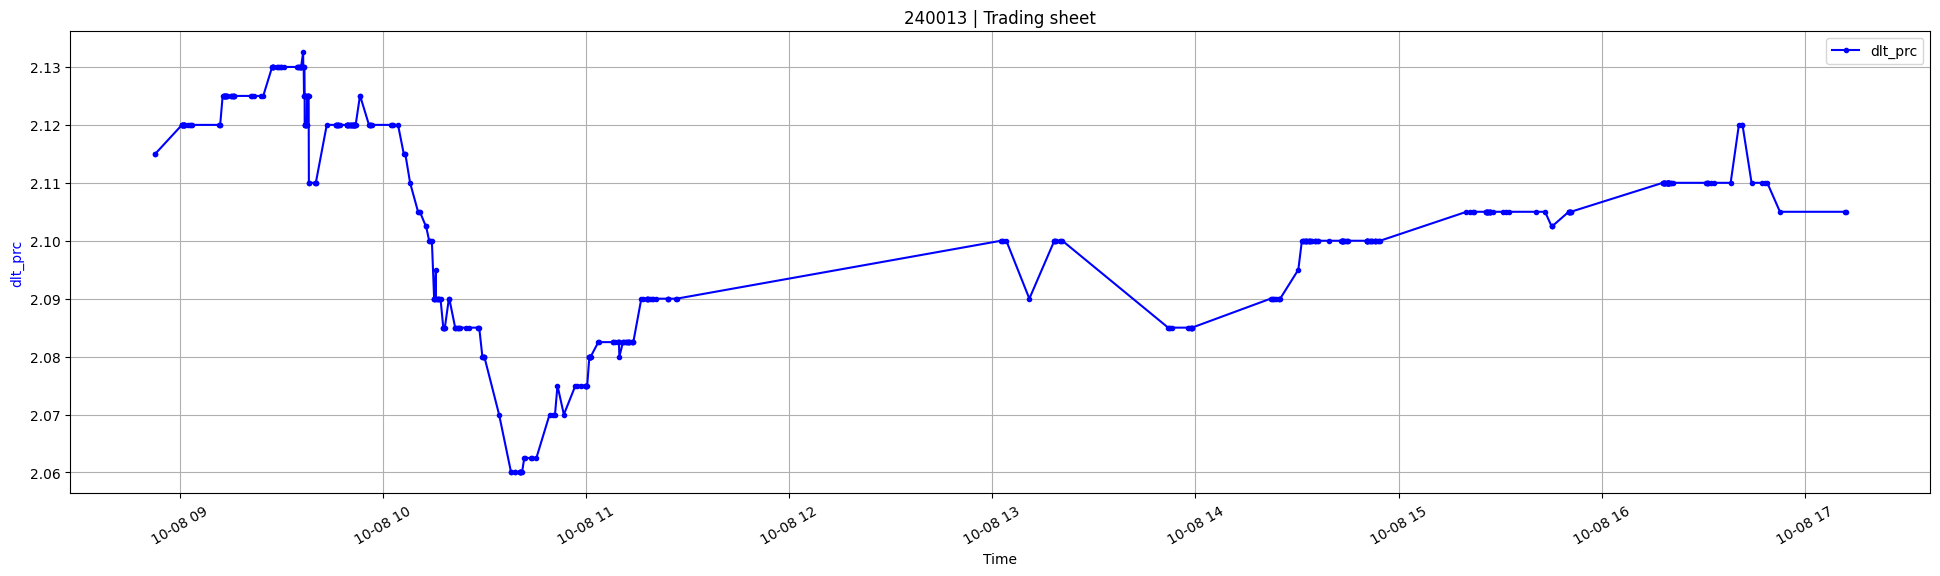

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取并筛选CSV文件中的债券数据
df_mkt = pd.read_csv('bond_brk10_08.csv')

# 筛选特定债券数据
df_mkt_filtered_data = df_mkt[df_mkt['bond_shrt_nm'] == '24附息国债13']

# 转换时间戳格式并去除时区信息
df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)

# 计算 'dlt_prc' 列的均值和标准差
mean_dlt_prc = df_mkt_filtered_data['dlt_prc'].mean()
std_dlt_prc = df_mkt_filtered_data['dlt_prc'].std()

# 剔除偏离均值10个标准差之外的数据
df_mkt_filtered_data = df_mkt_filtered_data[np.abs(df_mkt_filtered_data['dlt_prc'] - mean_dlt_prc) <= 10 * std_dlt_prc]

# 排序数据
df_mkt_filtered_data = df_mkt_filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
fig, ax1 = plt.subplots(figsize=(24, 6))

# 绘制dlt_prc的折线图
ax1.plot(df_mkt_filtered_data['timeStamp'], df_mkt_filtered_data['dlt_prc'], marker='o', markersize=3, label='dlt_prc', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('dlt_prc', color='blue')
ax1.set_title('240013 | Trading sheet')
ax1.tick_params(axis='x', rotation=30)
ax1.grid(True)

# 显示图例
ax1.legend(loc='upper right')

# 显示图像
plt.show()


/Users/dennis/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (19,49,143,144,145,146,147,148,149) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/44778267.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndm_transaction_filtered_data['timeStamp'] = pd.to_datetime(ndm_transaction_filtered_data['dl_tm'])


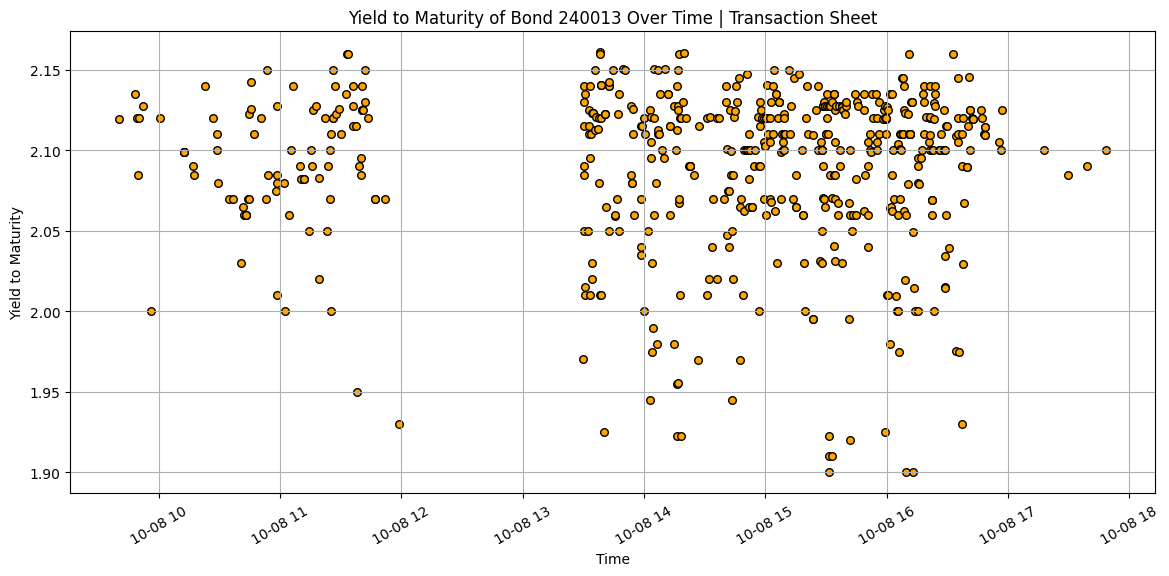

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并筛选特定债券数据
ndm_transaction_data = pd.read_csv('bond_dtl_10_08.csv')

# 筛选特定债券数据
ndm_transaction_filtered_data = ndm_transaction_data[ndm_transaction_data['bnds_nm'] == '24附息国债13']

# 转换时间戳格式 
ndm_transaction_filtered_data['timeStamp'] = pd.to_datetime(ndm_transaction_filtered_data['dl_tm'])
ndm_transaction_filtered_data = ndm_transaction_filtered_data[ndm_transaction_filtered_data['timeStamp'].dt.date == pd.to_datetime('2024-10-08').date()]

# 排序
ndm_transaction_sorted_data = ndm_transaction_filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
plt.figure(figsize=(14, 6))

# 自定义散点大小，可以按需求调整大小
scatter_sizes = 30

# 创建散点图
plt.scatter(
    ndm_transaction_sorted_data['timeStamp'],
    ndm_transaction_sorted_data['yld_to_mrty'],
    marker='o',
    color='orange',
    edgecolors='black',
    s=scatter_sizes
)

plt.xlabel('Time')
plt.ylabel('Yield to Maturity')
plt.title('Yield to Maturity of Bond 240013 Over Time | Transaction Sheet')
plt.xticks(rotation=30)
plt.grid(True)

# 显示图像
plt.show()


/Users/dennis/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (19,49,143,144,145,146,147,148,149) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/2410410660.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndm_transaction_filtered_data['timeStamp'] = pd.to_datetime(ndm_transaction_filtered_data['dl_tm'])


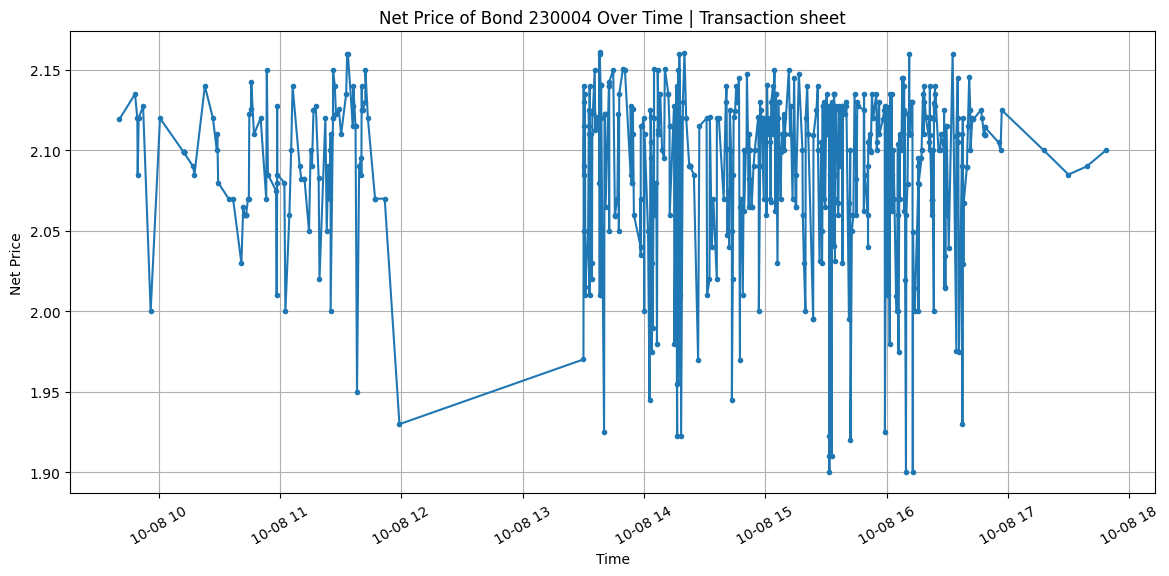

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件并筛选特定债券数据
ndm_transaction_data = pd.read_csv('bond_dtl_10_08.csv')

# print(data['bond_cd'])
ndm_transaction_filtered_data = ndm_transaction_data[ndm_transaction_data['bnds_nm'] == '24附息国债13']

# 转换时间戳格式 
ndm_transaction_filtered_data['timeStamp'] = pd.to_datetime(ndm_transaction_filtered_data['dl_tm'])
ndm_transaction_filtered_data = ndm_transaction_filtered_data[ndm_transaction_filtered_data['timeStamp'].dt.date == pd.to_datetime('2024-10-08').date()]

# 排序
ndm_transaction_sorted_data = ndm_transaction_filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
plt.figure(figsize=(14, 6))
plt.plot(ndm_transaction_sorted_data['timeStamp'], ndm_transaction_sorted_data['yld_to_mrty'], marker='o', markersize=3)
plt.xlabel('Time')
plt.ylabel('Net Price')
plt.title('Net Price of Bond 230004 Over Time | Transaction sheet')
plt.xticks(rotation=30)
plt.grid(True)

# 调整 y 轴范围
# plt.ylim(min(ndm_transaction_sorted_data['net_prc']) - 0.5, max(ndm_transaction_sorted_data['net_prc']) + 1)



plt.show()


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/436909946.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm'])


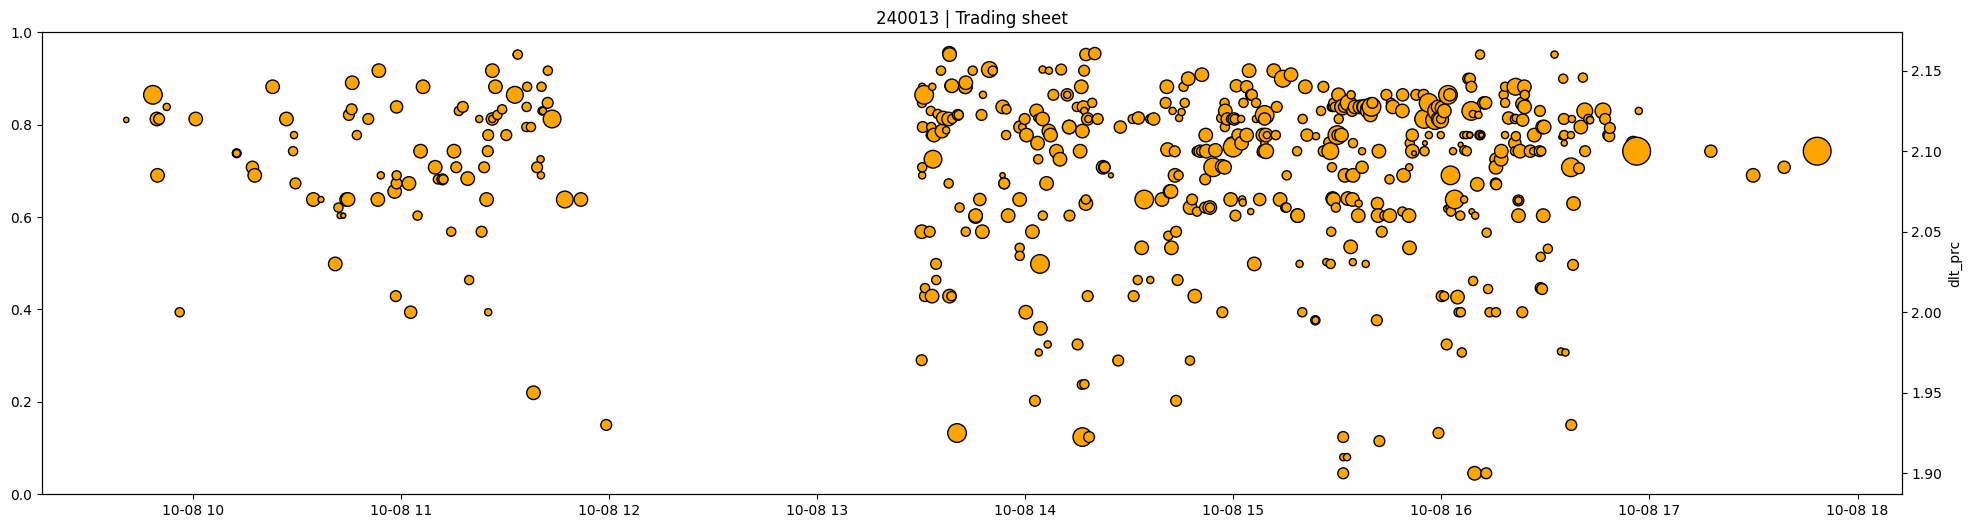

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件并筛选特定债券数据
df_mkt = pd.read_csv('bond_brk10_08.csv')

# 筛选特定债券数据
df_mkt_filtered_data = df_mkt[df_mkt['bond_shrt_nm'] == '24附息国债13']

# 转换时间戳格式
df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm'])

# df_mkt_filtered_data['timeStamp'] = df_mkt_filtered_data['dl_tm']
# 3. 计算 'dlt_prc' 列的均值和标准差
mean_dlt_prc = df_mkt_filtered_data['dlt_prc'].mean()
std_dlt_prc = df_mkt_filtered_data['dlt_prc'].std()

# 4. 剔除偏离均值10个标准差之外的数据
df_mkt_filtered_data = df_mkt_filtered_data[np.abs(df_mkt_filtered_data['dlt_prc'] - mean_dlt_prc) <= 10 * std_dlt_prc]

# 排序
df_mkt_filtered_data = df_mkt_filtered_data.sort_values(by='timeStamp', ascending=True)

# 创建绘图
fig, ax1 = plt.subplots(figsize=(24, 6))

# 读取nmnl_vol列数据
nmnl_vol = ndm_transaction_sorted_data['nmnl_vol']

# 计算合理的size范围，以及进行log转换
size_min = 10  # 最小size
size_max = 400  # 最大size
size_range = nmnl_vol  # 使用log转换

# 根据size范围进行归一化
size_scaled = (size_range - np.min(size_range)) / (np.max(size_range) - np.min(size_range))
# 映射到合理的size范围
scatter_sizes = size_min + (size_max - size_min) * size_scaled

# 创建右轴
ax2 = ax1.twinx()

# 绘制右轴数据，并传入size参数
ax2.scatter(
    ndm_transaction_sorted_data['timeStamp'],
    ndm_transaction_sorted_data['yld_to_mrty'],
    marker='o',
    color='orange',
    edgecolors='black',
    s=scatter_sizes  # 传入size参数
)
ax2.set_xlabel('Time')
ax2.set_ylabel('dlt_prc')
ax2.set_title('240013 | Trading sheet')

# ax2.set_ylim(y1_min, y1_max)

plt.show()


In [51]:
ndm_transaction_sorted_data

,Unnamed: 0,dl_cd,dt_cnfrm,txn_dt,dl_tm,bsns_tm,qt_rqst_cd,trd_rcrd_cd,prdct_cd,trdng_md_cd,...,upd_tm,pips_trd_f,bond_isin_cd,cmu_issue_no,isr_en_full_nm,isr_indstry,bond_bskt_dl_cd,bond_bskt_cd,bond_bskt_shrt_nm,timeStamp
33654,33654,CBT20241008200087,NaN,2024-10-08,2024-10-08 09:40:40+08:00,2024-10-08 09:40:40+08:00,2.410081e+17,NaN,CBT,QDM,...,2024-10-08 09:40:40+08:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-08 09:40:40+08:00
33669,33669,CBT20241008200112,NaN,2024-10-08,2024-10-08 09:48:21+08:00,2024-10-08 09:48:21+08:00,2.410081e+17,NaN,CBT,QDM,...,2024-10-08 09:48:21+08:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-08 09:48:21+08:00
33987,33987,CBT20241008900177,NaN,2024-10-08,2024-10-08 09:49:30+08:00,2024-10-08 09:49:30+08:00,NaN,NaN,CBT,ODM,...,2024-10-08 09:49:30+08:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-08 09:49:30+08:00
33604,33604,CBT20241008300110,NaN,2024-10-08,2024-10-08 09:49:41+08:00,2024-10-08 09:49:41+08:00,NaN,NaN,CBT,NDM,...,2024-10-08 09:49:42+08:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-08 09:49:41+08:00
33603,33603,CBT20241008900189,NaN,2024-10-08,2024-10-08 09:50:09+08:00,2024-10-08 09:50:09+08:00,NaN,NaN,CBT,ODM,...,2024-10-08 09:50:10+08:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-08 09:50:09+08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1193,CBT20241008214787,NaN,2024-10-08,2024-10-08 16:56:55+08:00,2024-10-08 16:56:55+08:00,2.410081e+17,NaN,CBT,QDM,...,2024-10-08 16:56:55+08:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-08 16:56:55+08:00
1141,1141,CBT20241008315503,NaN,2024-10-08,2024-10-08 17:17:42+08:00,2024-10-08 17:17:42+08:00,NaN,NaN,CBT,NDM,...,2024-10-08 17:18:34+08:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-08 17:17:42+08:00
548,548,CBT20241008315632,NaN,2024-10-08,2024-10-08 17:29:54+08:00,2024-10-08 17:29:54+08:00,NaN,NaN,CBT,NDM,...,2024-10-08 17:29:54+08:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-08 17:29:54+08:00
1559,1559,CBT20241008215040,NaN,2024-10-08,2024-10-08 17:38:51+08:00,2024-10-08 17:38:51+08:00,2.410081e+17,NaN,CBT,QDM,...,2024-10-08 17:38:52+08:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-08 17:38:51+08:00


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/2021371731.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)
/Users/dennis/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (19,49,143,144,145,146,147,148,149) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


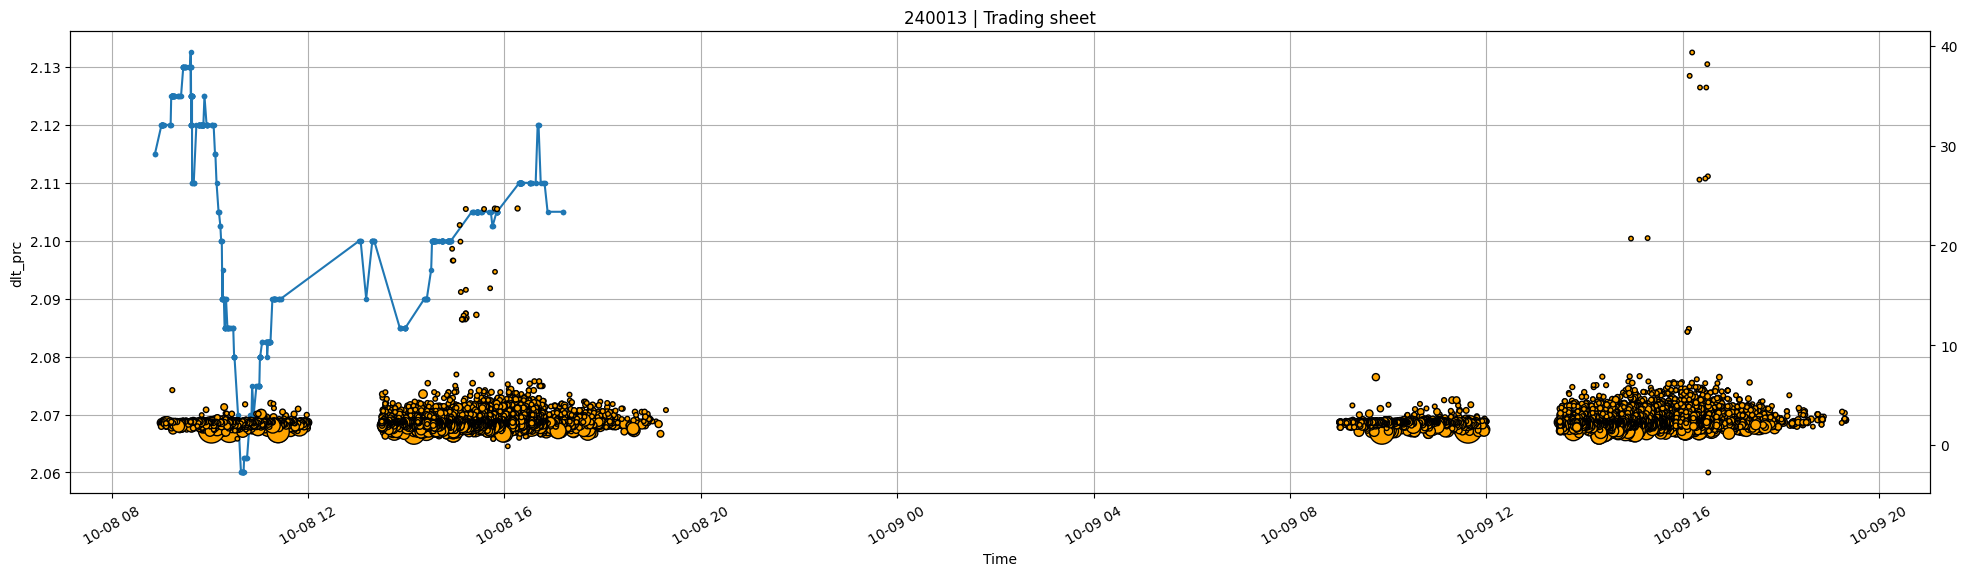

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件并筛选特定债券数据
df_mkt = pd.read_csv('bond_brk10_08.csv')

# 筛选特定债券数据
df_mkt_filtered_data = df_mkt[df_mkt['bond_shrt_nm'] == '24附息国债13']

# 转换时间戳格式
df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)

# df_mkt_filtered_data['timeStamp'] = df_mkt_filtered_data['dl_tm']
# 3. 计算 'dlt_prc' 列的均值和标准差
mean_dlt_prc = df_mkt_filtered_data['dlt_prc'].mean()
std_dlt_prc = df_mkt_filtered_data['dlt_prc'].std()

# 4. 剔除偏离均值10个标准差之外的数据
df_mkt_filtered_data = df_mkt_filtered_data[np.abs(df_mkt_filtered_data['dlt_prc'] - mean_dlt_prc) <= 10 * std_dlt_prc]

# 排序
df_mkt_filtered_data = df_mkt_filtered_data.sort_values(by='timeStamp', ascending=True)
df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm'])


ndm_transaction_sorted_data = pd.read_csv('bond_dtl_10_08.csv')
ndm_transaction_filtered_data = ndm_transaction_filtered_data[ndm_transaction_filtered_data['timeStamp'].dt.date == pd.to_datetime('2024-10-08').date()]
ndm_transaction_sorted_data['timeStamp'] = pd.to_datetime(ndm_transaction_sorted_data['dl_tm']).dt.tz_localize(None)
# 创建绘图
fig, ax1 = plt.subplots(figsize=(24, 6))

# 绘制左轴数据
ax1.plot(df_mkt_filtered_data['timeStamp'], df_mkt_filtered_data['dlt_prc'], marker='o', markersize=3, label='dlt_prc')
ax1.set_xlabel('Time')
ax1.set_ylabel('dlt_prc')
ax1.set_title('240013 | Trading sheet')
ax1.tick_params(axis='x', rotation=30)
ax1.grid(True)

# 调整左轴y轴范围
# y1_min = min(df_mkt_sorted_data['wghtd_avg_net_prc'])-0.1
# y1_max = max(df_mkt_sorted_data['wghtd_avg_net_prc'])+0.1
# ax1.set_ylim(y1_min, y1_max)

# 创建右轴

# 绘制右轴数据（假设ndm_transaction_sorted_data已经定义并且有合适的数据）
# ax2.scatter(ndm_transaction_sorted_data['timeStamp'], ndm_transaction_sorted_data['net_prc'], marker='o', color='orange')

# 读取nmnl_vol列数据
nmnl_vol = ndm_transaction_sorted_data['nmnl_vol']

# 计算合理的size范围，以及进行log转换
size_min = 10  # 最小size
size_max = 400  # 最大size
size_range = nmnl_vol  # 使用log转换

# 根据size范围进行归一化
size_scaled = (size_range - np.min(size_range)) / (np.max(size_range) - np.min(size_range))
# 映射到合理的size范围
scatter_sizes = size_min + (size_max - size_min) * size_scaled

# 创建右轴
ax2 = ax1.twinx()

# 绘制右轴数据，并传入size参数
ax2.scatter(
    ndm_transaction_sorted_data['timeStamp'],
    ndm_transaction_sorted_data['yld_to_mrty'],
    marker='o',
    color='orange',
    edgecolors='black',
    s=scatter_sizes  # 传入size参数
)


# ax2.set_ylim(y1_min, y1_max)

plt.show()


In [21]:
df_mkt_filtered_data

,Unnamed: 0,dl_cd,chnl,dl_st,bond_cd,txn_mkt,bond_shrt_nm,tp_of_prc,dlt_prc,trd_prc_dir,dl_tm,prd,trd_vol,crdt_rtng,crt_tm,upd_tm,timeStamp
4528,4528,e1293133947059982338,TP,3,240013,1,24附息国债13,10.0,2.115,GVN,2024/10/08 08:52:38,6.71Y,2000.0,--,2024-10-08 08:52:38.338617,2024-10-08 08:52:38.338617,2024-10-08 08:52:38
4529,4529,e1293133947059982338,TP,14,240013,1,24附息国债13,10.0,2.115,GVN,2024/10/08 08:52:45,6.71Y,2000.0,--,2024-10-08 08:52:45.656739,2024-10-08 08:52:45.656739,2024-10-08 08:52:45
19714,19714,1017241133,PATR,3,240013,1,24附息国债13,10.0,2.120,GVN,2024/10/08 09:00:39,6.71Y,NaN,--,2024-10-08 09:00:40.634889,2024-10-08 09:00:40.634889,2024-10-08 09:00:39
17184,17184,1017241128,PATR,3,240013,1,24附息国债13,10.0,2.120,GVN,2024/10/08 09:00:39,6.71Y,NaN,--,2024-10-08 09:00:40.150024,2024-10-08 09:00:40.150024,2024-10-08 09:00:39
20674,20674,e1293135998892527617,TP,3,240013,1,24附息国债13,10.0,2.120,GVN,2024/10/08 09:00:47,6.71Y,2000.0,--,2024-10-08 09:00:47.555194,2024-10-08 09:00:47.555194,2024-10-08 09:00:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11121,11121,e1293253436065861633,TP,3,240013,1,24附息国债13,10.0,2.110,TKN,2024/10/08 16:48:13,6.71Y,3000.0,--,2024-10-08 16:48:13.501040,2024-10-08 16:48:13.501040,2024-10-08 16:48:13
11126,11126,e1293253436065861633,TP,3,240013,1,24附息国债13,10.0,2.110,TKN,2024/10/08 16:48:55,6.71Y,3000.0,--,2024-10-08 16:48:55.508199,2024-10-08 16:48:55.508199,2024-10-08 16:48:55
3305,3305,80010229265,BGC,3,240013,1,24附息国债13,10.0,2.105,TKN,2024/10/08 16:52:40,6.71Y,NaN,--,2024-10-08 16:52:40.730346,2024-10-08 16:52:40.730346,2024-10-08 16:52:40
21536,21536,e1293259615043211267,TP,3,240013,1,24附息国债13,10.0,2.105,GVN,2024/10/08 17:11:59,6.71Y,5000.0,--,2024-10-08 17:12:54.524820,2024-10-08 17:12:54.524820,2024-10-08 17:11:59


/var/folders/gj/bwfyx1ks0p17lbgn6fl1nx1c0000gp/T/ipykernel_16514/2783334708.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)
/Users/dennis/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3505: DtypeWarning: Columns (19,49,143,144,145,146,147,148,149) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


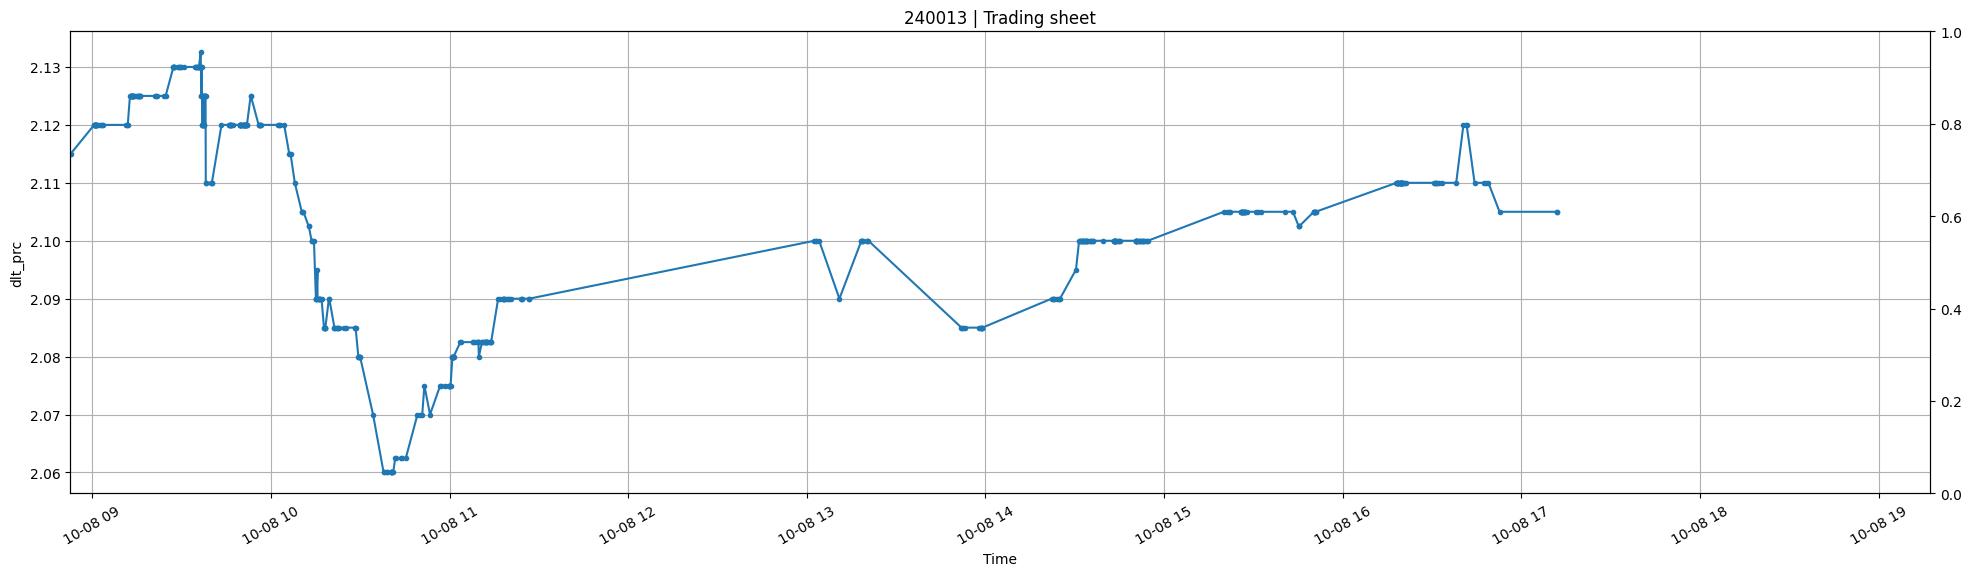

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件并筛选特定债券数据
df_mkt = pd.read_csv('bond_brk10_08.csv')

# 筛选特定债券数据
df_mkt_filtered_data = df_mkt[df_mkt['bond_shrt_nm'] == '24附息国债13']

# 转换时间戳格式并去除时区信息（转为 tz-naive）
df_mkt_filtered_data['timeStamp'] = pd.to_datetime(df_mkt_filtered_data['dl_tm']).dt.tz_localize(None)

# 计算 'dlt_prc' 列的均值和标准差
mean_dlt_prc = df_mkt_filtered_data['dlt_prc'].mean()
std_dlt_prc = df_mkt_filtered_data['dlt_prc'].std()

# 剔除偏离均值10个标准差之外的数据
df_mkt_filtered_data = df_mkt_filtered_data[np.abs(df_mkt_filtered_data['dlt_prc'] - mean_dlt_prc) <= 10 * std_dlt_prc]

# 排序数据
df_mkt_filtered_data = df_mkt_filtered_data.sort_values(by='timeStamp', ascending=True)

# 假设ndm_transaction_sorted_data已经定义并包含相应数据
ndm_transaction_sorted_data = pd.read_csv('bond_dtl_10_08.csv')

# 转换时间戳格式并去除时区信息（转为 tz-naive）
ndm_transaction_sorted_data['timeStamp'] = pd.to_datetime(ndm_transaction_sorted_data['dl_tm']).dt.tz_localize(None)
ndm_transaction_sorted_data = ndm_transaction_sorted_data[ndm_transaction_sorted_data['timeStamp'].dt.date == pd.to_datetime('2024-10-08').date()]

# 获取两个数据集的时间戳的最小值和最大值
min_time = min(df_mkt_filtered_data['timeStamp'].min(), ndm_transaction_sorted_data['timeStamp'].min())
max_time = max(df_mkt_filtered_data['timeStamp'].max(), ndm_transaction_sorted_data['timeStamp'].max())

# 创建绘图
fig, ax1 = plt.subplots(figsize=(24, 6))

# 绘制左轴数据 (dlt_prc)
ax1.plot(df_mkt_filtered_data['timeStamp'], df_mkt_filtered_data['dlt_prc'], marker='o', markersize=3, label='dlt_prc')
ax1.set_xlabel('Time')
ax1.set_ylabel('dlt_prc')
ax1.set_title('240013 | Trading sheet')
ax1.tick_params(axis='x', rotation=30)
ax1.grid(True)
# ax1.set_xlim([min_time, max_time])  # 设置左轴的 x 轴范围

# 读取nmnl_vol列数据并计算size范围
nmnl_vol = ndm_transaction_sorted_data['nmnl_vol']
size_min = 10  # 最小size
size_max = 400  # 最大size
size_range = nmnl_vol  # 使用log转换

# 根据size范围进行归一化
size_scaled = (size_range - np.min(size_range)) / (np.max(size_range) - np.min(size_range))
# 映射到合理的size范围
scatter_sizes = size_min + (size_max - size_min) * size_scaled

# 创建右轴
ax2 = ax1.twinx()

# 绘制右轴数据 (yld_to_mrty)
# ax2.scatter(
#     ndm_transaction_sorted_data['timeStamp'],
#     ndm_transaction_sorted_data['yld_to_mrty'],
#     marker='o',
#     color='orange',
#     edgecolors='black',
#     s=scatter_sizes  # 根据交易量设置点的大小
# )

ax2.set_xlim([min_time, max_time])  # 设置右轴的 x 轴范围与左轴一致

plt.show()
